# 6.4 Machine Learning Adidas data set

### This script contains the following:¶
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

In [29]:
# 1. Importing libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path

In [4]:
path = Path("C:/", "Users", "nayla", "Desktop", "Carrer F", "Curso de inmersion", "Unidad 6")

In [5]:
data = pd.read_csv( 
    path.joinpath('02 data', 'Adidas_US_Sales-clean.csv'), index_col=0, sep=",")

In [6]:
data

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,2020-05-01,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet
9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet
9645,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet
9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet


3. Data prep for regression analysis

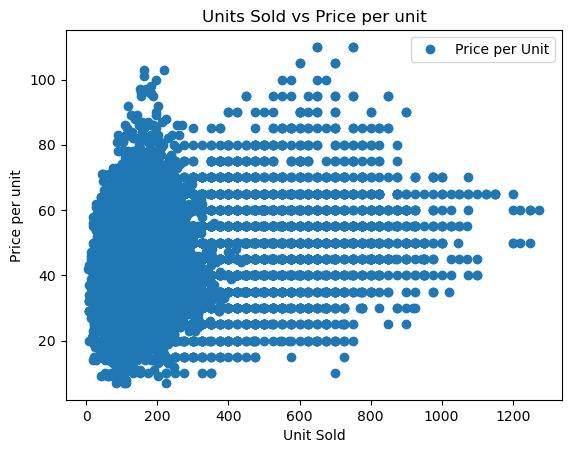

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data.plot(x = 'Units Sold', y='Price per Unit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Units Sold vs Price per unit')  
plt.xlabel('Unit Sold')  
plt.ylabel('Price per unit')  
plt.show()

## 5.State your hypothesis in a markdown cell within your Jupyter notebook.
### Hypothesis.
### "The higher the price per unit, the lower the sales."

## 6.Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = data['Units Sold'].values.reshape(-1,1)
y = data['Price per Unit'].values.reshape(-1,1)

In [12]:
X

array([[1200],
       [1000],
       [1000],
       ...,
       [ 184],
       [  70],
       [  83]], dtype=int64)

In [13]:
y

array([[50],
       [50],
       [40],
       ...,
       [41],
       [42],
       [29]], dtype=int64)

## 7.Split the data into two sets: a training set and a test set.

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Regression analysis

In [17]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 9.Create a plot that shows the regression line on the test set.

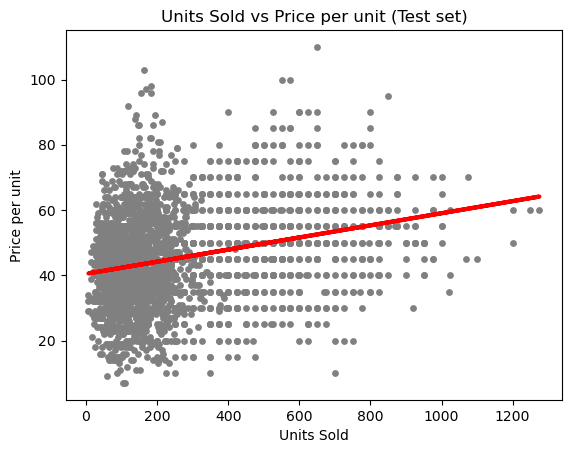

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Units Sold vs Price per unit (Test set)')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Price per unit')
plot_test.show()

### 10.Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The red line is the regression line.
It can be seen that the red line covers the graph almost horizontally from right to left, but many values are very far from our regression lines.

# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01857642]]
Mean squared error:  197.28126212863026
R2 score:  0.06434470285051896


## 11.Check the model performance statistics—MSE and R2 score.
The slope is 0.01 or almost 0.
A coefficient of zero would mean that as X increases, y stays the same.

The mean square error tells us how close a regression line is to a set of points (ie its precision). in our case it is very large MSE=197.28, that is, it is not precise.

R2: value which is a metric that tells you how well the model explains the variation in the data. in our case R2=0.06 and it indicates that it is a bad result.

In conclusion the model is not working well.

In [23]:
y_predicted

array([[51.58657439],
       [50.65775342],
       [41.10947388],
       ...,
       [46.47805907],
       [43.22718569],
       [41.51815511]])

## 12.Compare the predicted y values with the actual y values in a dataframe.

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

dataComparing = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
dataComparing.head(30)

,Actual,Predicted
0,30,51.586574
1,50,50.657753
2,55,41.109474
3,24,42.521282
4,39,41.648190
5,43,44.193159
6,46,41.833954
7,55,41.313814
8,70,47.871291
9,32,41.481002


## 13.Include your thoughts on how well the model performed on the test set in a markdown cell.
### Include any reflections you have on the impact of possible data bias.
The model does not fit reality. This may be because the sample is too small, or we have too many autliers. Or we need to do another type of regression that is not linear.